In [ ]:
# Install scikit-learn
# !pip install scikit-learn==1.2.2
!pip install -U scikit-learn
# Import scikit-learn and print its version
import sklearn
print("Scikit-learn version:", sklearn.__version__)


Scikit-learn version: 1.4.1.post1


In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from scipy.stats import randint, uniform
from sklearn.metrics import mean_absolute_error
import json
import joblib



In [ ]:

# Provided lists
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
brands = ['Apple', 'Samsung', 'Huawei', 'Xiaomi', 'Oppo', 'OnePlus', 'Google', 'Sony', 'LG', 'Motorola']
price = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]
marketing_budget = [1, 5, 10, 20, 50, 100, 200]
regions = ['North America', 'Europe', 'Asia', 'South America', 'Africa', 'Oceania']
screen_size = [4.5, 4.7, 5.0, 5.2, 5.5, 5.8, 6.0, 6.2, 6.4, 6.5, 6.7, 6.8, 6.9, 7.0]
ram = [2, 3, 4, 6, 8, 12, 16]
storage = [32, 64, 128, 256, 512, 1024]
camera_quality = [8, 12, 16, 20, 24, 32, 48, 64, 108]

# Generate random data
data = []
for _ in range(10000):
    quarter = random.choice(quarters)
    brand = random.choice(brands)
    screen = random.choice(screen_size)
    ram_val = random.choice(ram)
    storage_val = random.choice(storage)
    price_val = random.choice(price)
    camera_val = random.choice(camera_quality)
    marketing_val = random.choice(marketing_budget)*100
    region = random.choice(regions)
    units_sold = random.randint(100, 1000)  # Random units sold in millions
    data.append([brand, screen, ram_val, storage_val, price_val, camera_val, marketing_val, region, quarter, units_sold])

# Create DataFrame
data = pd.DataFrame(data, columns=['Brand', 'Screen Size', 'RAM', 'Storage', 'Price (USD)',
                                 'Camera (MP)', 'Marketing Budget (USD)', 'Region', 'Quarter',
                                 'Units Sold (millions)'])

# Display DataFrame
data.head()


,Brand,Screen Size,RAM,Storage,Price (USD),Camera (MP),Marketing Budget (USD),Region,Quarter,Units Sold (millions)
0,Huawei,5.2,12,128,200,8,500,North America,Q4,821
1,Sony,4.5,3,256,100,24,500,Oceania,Q1,401
2,Sony,6.4,16,1024,900,12,20000,Africa,Q4,915
3,OnePlus,7.0,4,1024,600,8,20000,Asia,Q4,562
4,Motorola,6.5,12,32,300,48,2000,Europe,Q4,179


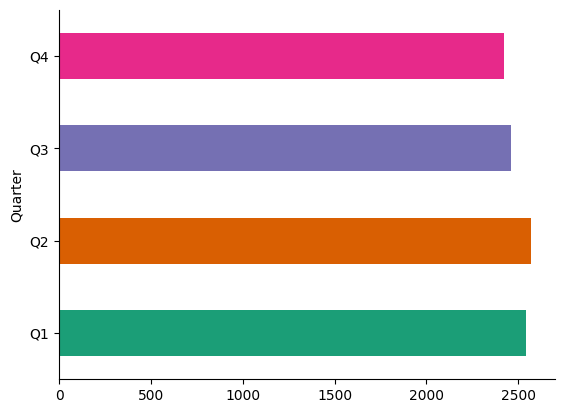

In [ ]:
# @title Quarter

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Quarter').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

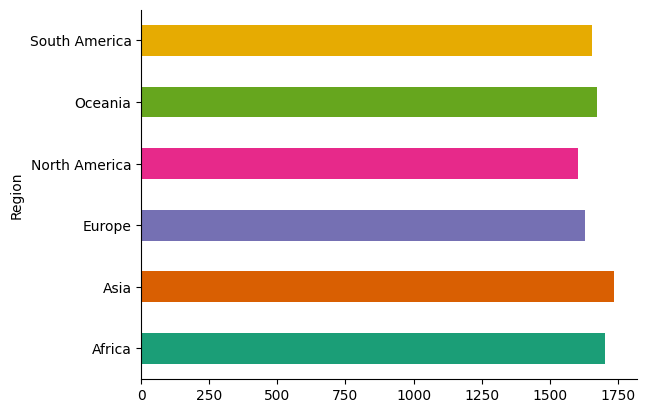

In [ ]:
# @title Region

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# The Brand column contains the brand of the smartphone, randomly assigned from a list of popular brands.
# The Price column represents the price of the smartphone, randomly generated between $500 and $1200.
# The Screen Size column contains the screen size of the smartphone in inches, randomly generated between 5.5 and 6.5 inches.
# The RAM column represents the amount of RAM in GB, randomly assigned between 4 and 12 GB.
# The Storage column contains the storage capacity in GB, randomly assigned between 64 and 512 GB.
# The Camera Quality column represents a score for the camera quality, randomly generated between 10 and 50.
# The Marketing Budget column contains the marketing budget for the product in dollars, randomly generated between $1,000,000 and $10,000,000.
# The Region column represents the geographic region, randomly assigned from a list of regions.
# The Quarter column contains the Quarter, randomly assigned from a list of Quarters.
# The Units Sold (millions) column is the target variable, representing the Units Sold (millions) for the product in terms of the number of units, randomly generated between 10,000 and 1,000,000.

      Brand  Screen Size  RAM  Storage  Price (USD)  Camera (MP)  \
0    Huawei          5.2   12      128          200            8   
1      Sony          4.5    3      256          100           24   
2      Sony          6.4   16     1024          900           12   
3   OnePlus          7.0    4     1024          600            8   
4  Motorola          6.5   12       32          300           48   

   Marketing Budget (USD)         Region Quarter  Units Sold (millions)  
0                     500  North America      Q4                    821  
1                     500        Oceania      Q1                    401  
2                   20000         Africa      Q4                    915  
3                   20000           Asia      Q4                    562  
4                    2000         Europe      Q4                    179  
       Screen Size           RAM      Storage   Price (USD)   Camera (MP)  \
count  10000.00000  10000.000000  10000.00000  10000.000000  10000.000

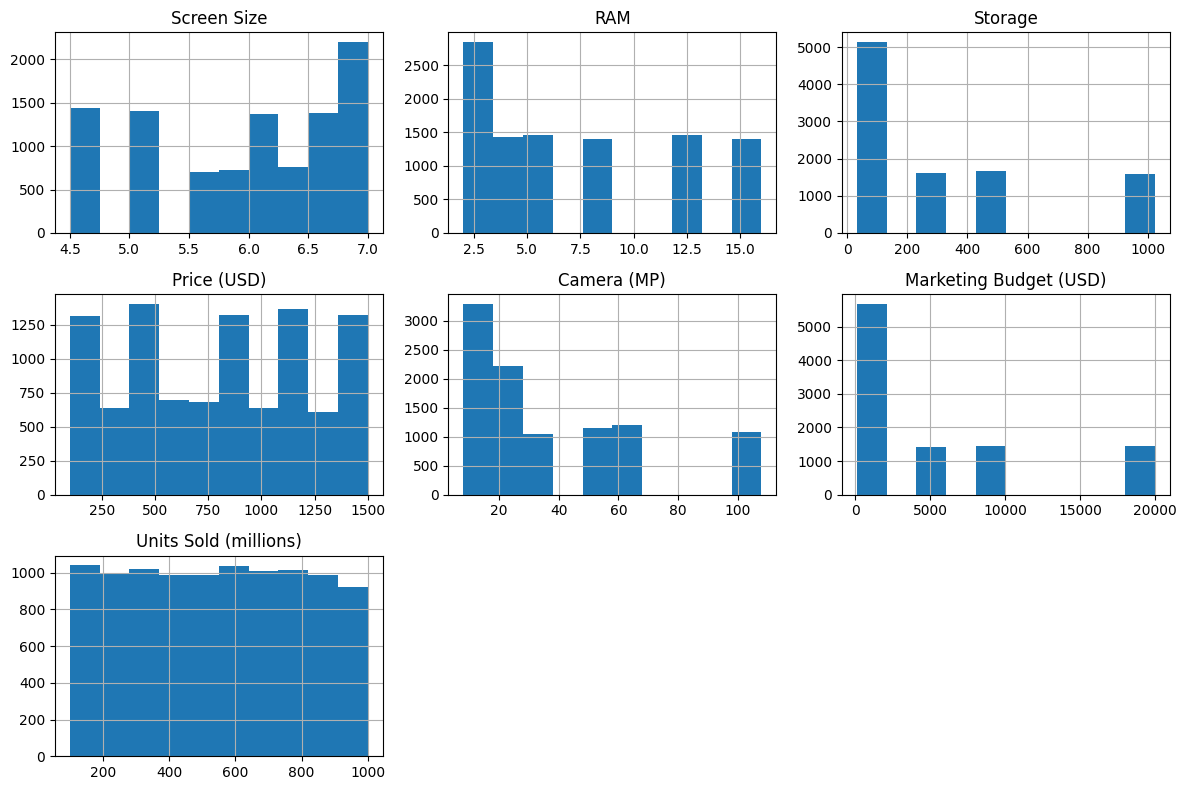

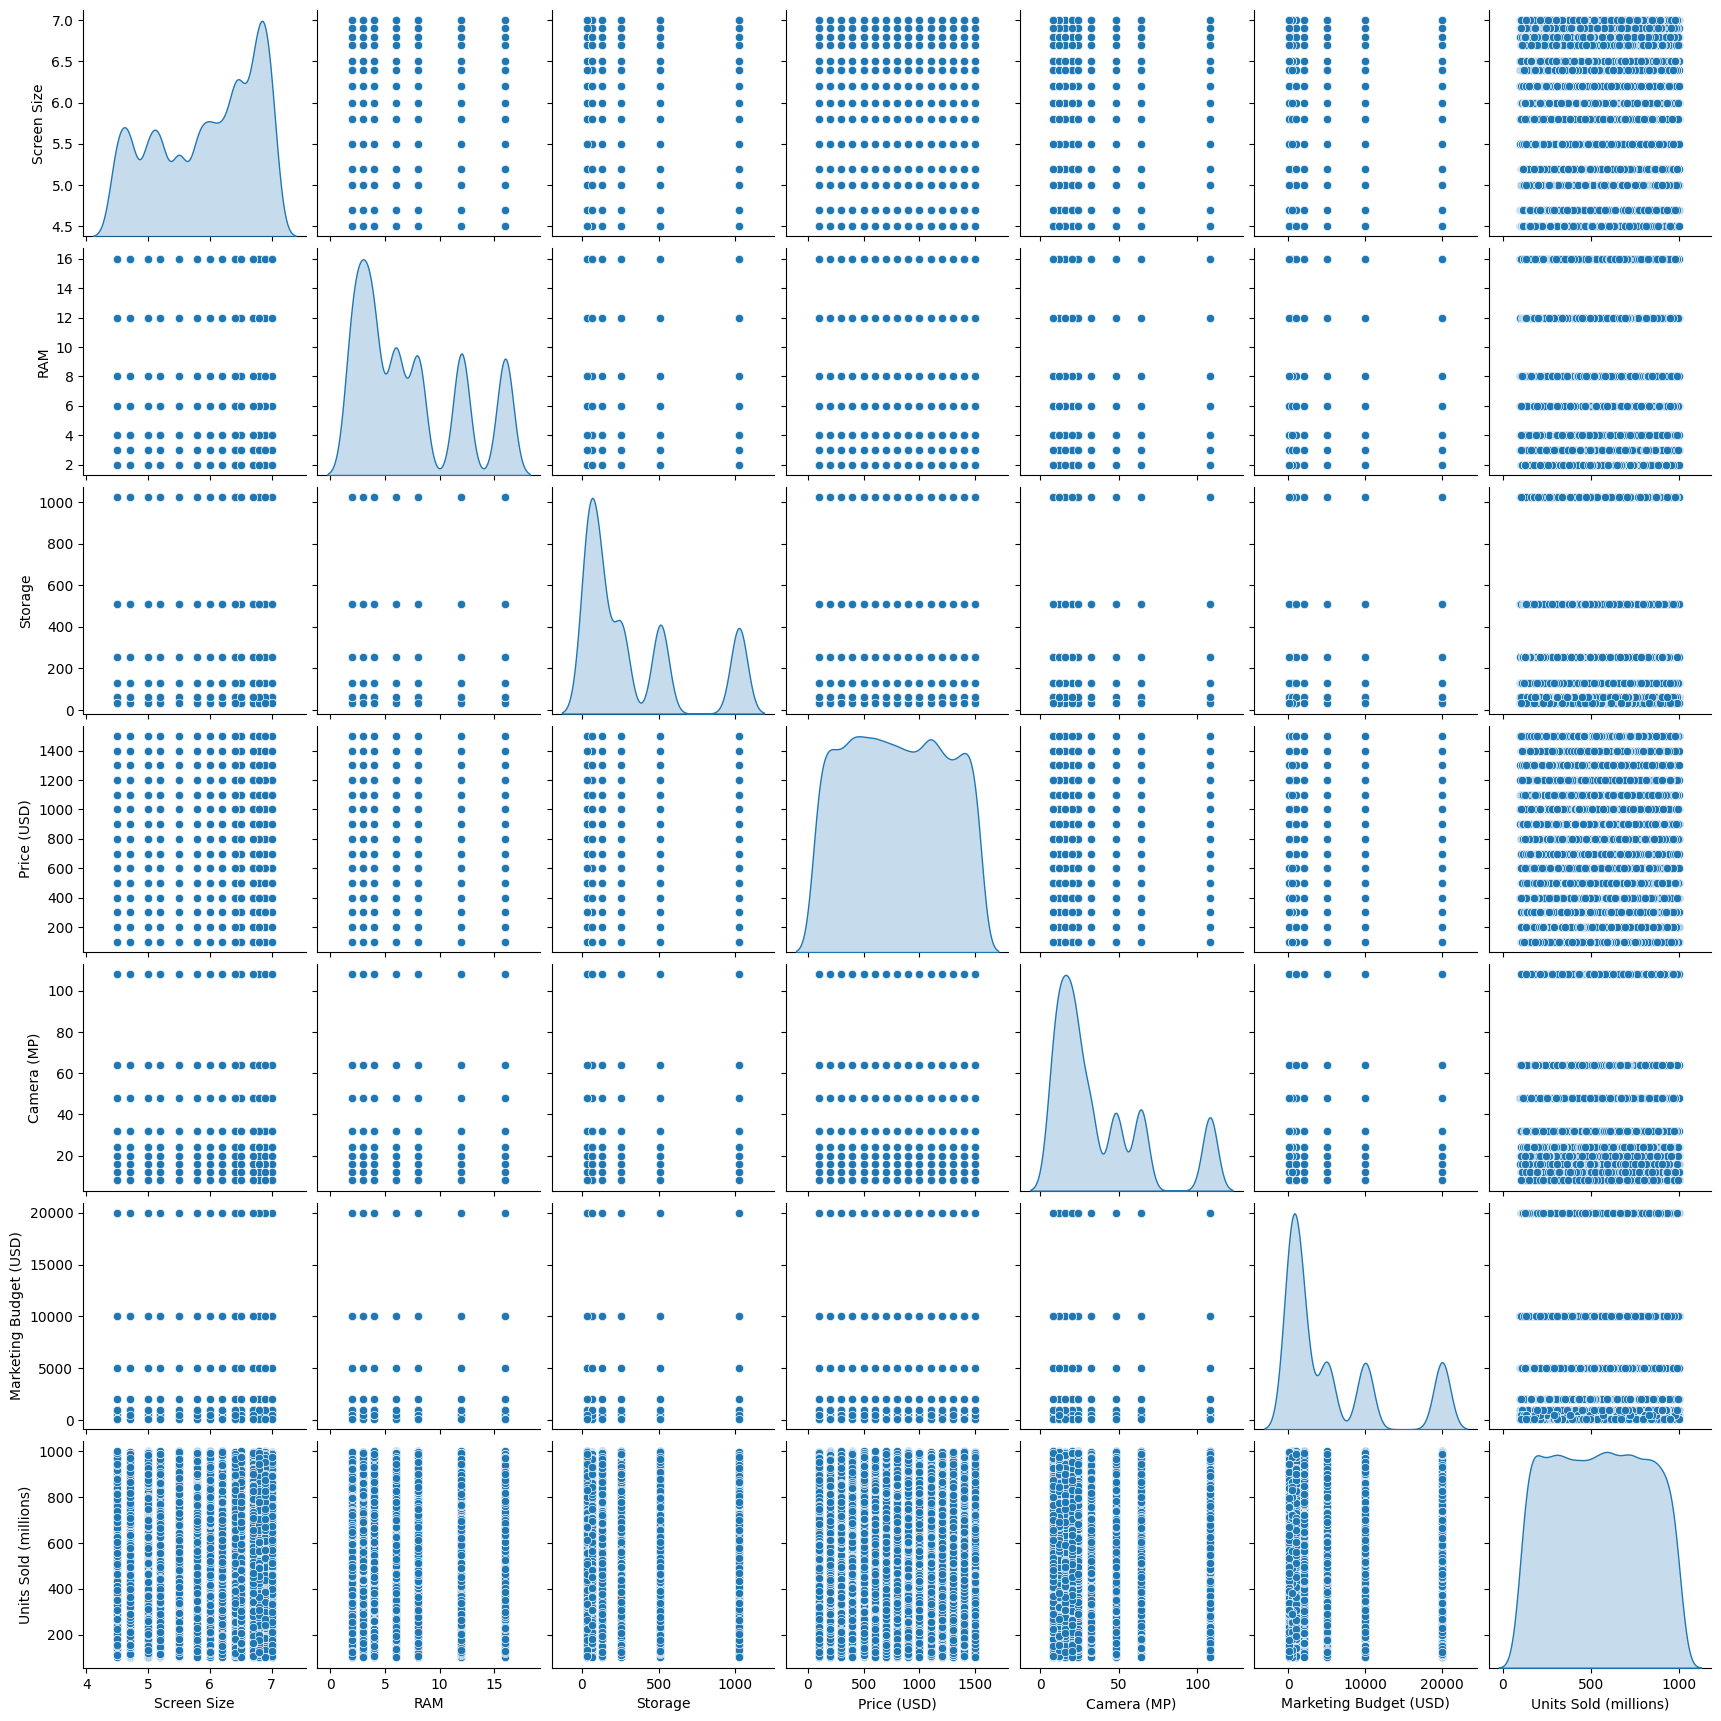

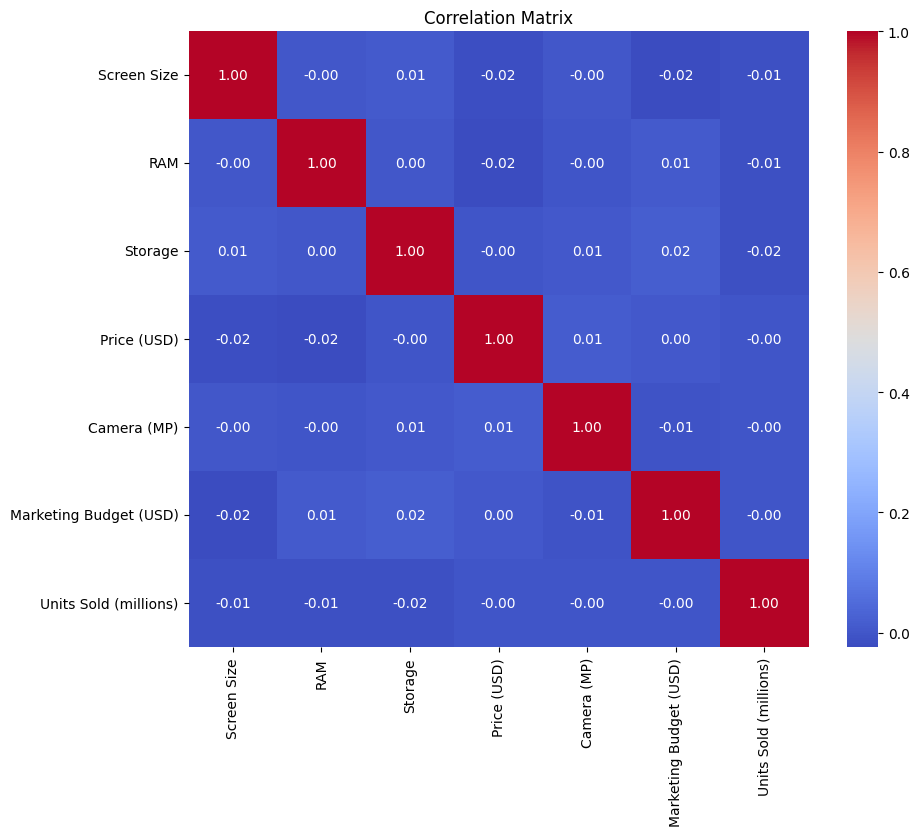

In [ ]:
# Step 1: Check the first few rows of the DataFrame
print(data.head())

# Step 2: Check summary statistics of numerical columns
print(data.describe())

# Step 3: Visualize distributions of numerical columns using histograms
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
data.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Step 4: Visualize relationship between pairs of numerical columns using scatter plots
import seaborn as sns

# Pairplot for selected numerical columns
sns.pairplot(data[['Screen Size', 'RAM', 'Storage', 'Price (USD)', 'Camera (MP)', 'Marketing Budget (USD)', 'Units Sold (millions)']], diag_kind='kde')
plt.show()

# Step 5: Compute and visualize correlation matrix between numerical columns
corr_matrix = data[['Screen Size', 'RAM', 'Storage', 'Price (USD)', 'Camera (MP)', 'Marketing Budget (USD)', 'Units Sold (millions)']].corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Save the DataFrame to a CSV file
data.to_csv('smartphone_data.csv', index=False)

In [ ]:
# Get the number of rows and columns
print(f"Number of rows: {data.shape[0]}, Number of columns: {data.shape[1]}")

# Get the column names
print("Column names:", data.columns.tolist())

# Get the unique values in each column
for col in data.columns:
    print(f"Unique values in '{col}' column: {data[col].unique()}")

# Get summary statistics for numerical columns
print(data.describe())

Number of rows: 10000, Number of columns: 10
Column names: ['Brand', 'Screen Size', 'RAM', 'Storage', 'Price (USD)', 'Camera (MP)', 'Marketing Budget (USD)', 'Region', 'Quarter', 'Units Sold (millions)']
Unique values in 'Brand' column: ['Huawei' 'Sony' 'OnePlus' 'Motorola' 'LG' 'Apple' 'Google' 'Samsung'
 'Oppo' 'Xiaomi']
Unique values in 'Screen Size' column: [5.2 4.5 6.4 7.  6.5 6.8 5.5 6.9 6.7 5.  4.7 6.  6.2 5.8]
Unique values in 'RAM' column: [12  3 16  4  2  8  6]
Unique values in 'Storage' column: [ 128  256 1024   32  512   64]
Unique values in 'Price (USD)' column: [ 200  100  900  600  300  500 1000 1300  400  700 1100 1500  800 1400
 1200]
Unique values in 'Camera (MP)' column: [  8  24  12  48  20  32  16 108  64]
Unique values in 'Marketing Budget (USD)' column: [  500 20000  2000   100  5000 10000  1000]
Unique values in 'Region' column: ['North America' 'Oceania' 'Africa' 'Asia' 'Europe' 'South America']
Unique values in 'Quarter' column: ['Q4' 'Q1' 'Q2' 'Q3']
Unique va

First few rows of the dataset:
      Brand  Screen Size  RAM  Storage  Price (USD)  Camera (MP)  \
0    Huawei          5.2   12      128          200            8   
1      Sony          4.5    3      256          100           24   
2      Sony          6.4   16     1024          900           12   
3   OnePlus          7.0    4     1024          600            8   
4  Motorola          6.5   12       32          300           48   

   Marketing Budget (USD)         Region Quarter  Units Sold (millions)  
0                     500  North America      Q4                    821  
1                     500        Oceania      Q1                    401  
2                   20000         Africa      Q4                    915  
3                   20000           Asia      Q4                    562  
4                    2000         Europe      Q4                    179  

Missing values in each column:
Brand                     0
Screen Size               0
RAM                       0


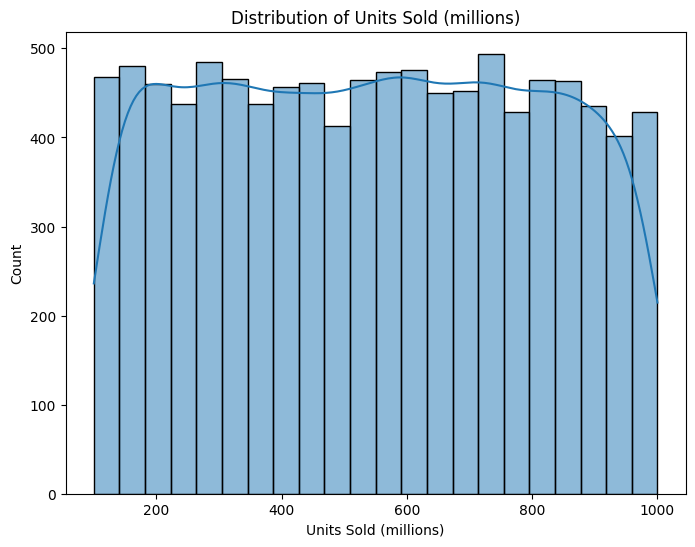

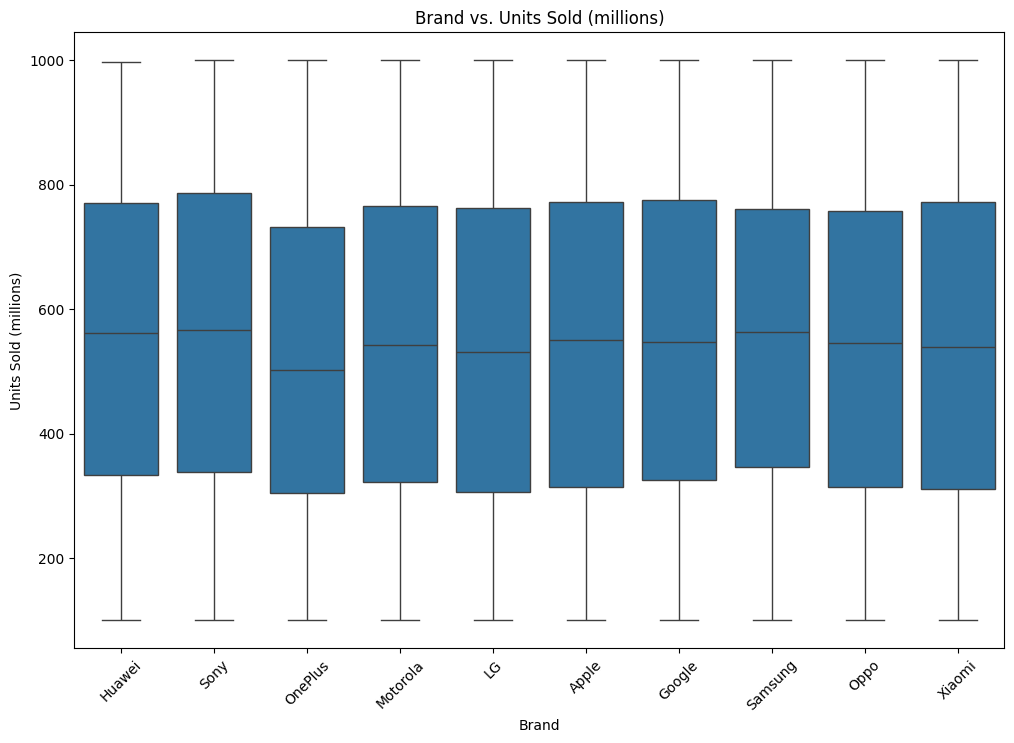

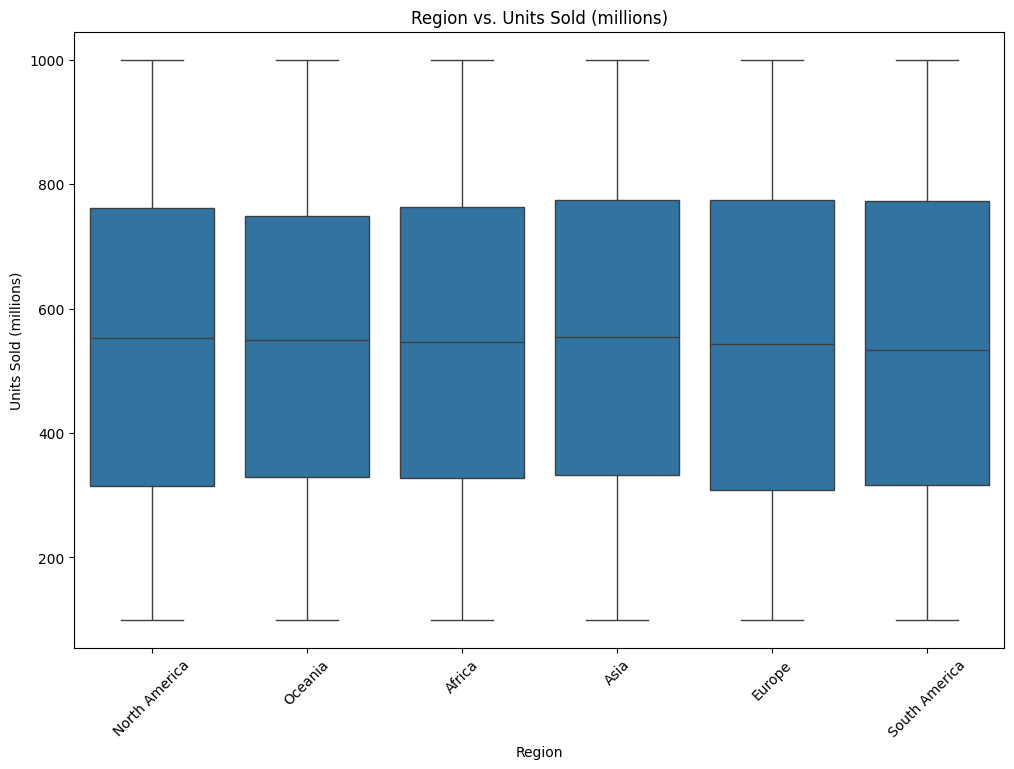

In [ ]:

# Display the first few rows
print("First few rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Explore numerical features
print("\nSummary statistics for numerical features:")
print(data.describe())

# Explore categorical features
print("\nUnique values in categorical features:")
print("Brand:",data['Brand'].nunique())
print("Region:",data['Region'].nunique())
print("Quarter:",data['Quarter'].nunique())

# Visualize the distribution of the target variable (Units Sold (millions))
plt.figure(figsize=(8, 6))
sns.histplot(data['Units Sold (millions)'], kde=True)
plt.title('Distribution of Units Sold (millions)')
plt.show()

# Visualize the relationship between categorical features and the target variable
plt.figure(figsize=(12, 8))
sns.boxplot(x='Brand', y='Units Sold (millions)', data=data)
plt.title('Brand vs. Units Sold (millions)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='Units Sold (millions)', data=data)
plt.title('Region vs. Units Sold (millions)')
plt.xticks(rotation=45)
plt.show()

In [ ]:

# Separate the target variable (Price) from the features
X = data.drop('Units Sold (millions)', axis=1)
y = data['Units Sold (millions)']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a column transformer for one-hot encoding
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')

# Apply one-hot encoding to the training and test sets
X_train_processed = ct.fit_transform(X_train)
X_test_processed = ct.transform(X_test)

# Create and train the Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=100)
dt_model.fit(X_train_processed, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test_processed)

# Evaluate the model
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)
print("Decision Tree Regression:")
print(f"Mean Squared Error: {dt_mae:.2f}")
print(f"R-squared: {dt_r2:.2f}")

# Create and train the Random Forest Regression model
rf_model = RandomForestRegressor(random_state=100)
rf_model.fit(X_train_processed, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_processed)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
print("\nRandom Forest Regression:")
print(f"Mean Squared Error: {rf_mae:.2f}")
print(f"R-squared: {rf_r2:.2f}")

Decision Tree Regression:
Mean Squared Error: 306.76
R-squared: -1.09

Random Forest Regression:
Mean Squared Error: 226.98
R-squared: -0.05


In [ ]:
X_train_processed.shape

(8000, 26)

In [ ]:
X_test_processed.shape

(2000, 26)

In [ ]:
categorical_cols

Index(['Brand', 'Region', 'Quarter'], dtype='object')

In [ ]:
X_test.shape

(2000, 9)

In [ ]:
X_train.shape

(8000, 9)

In [ ]:

# Define hyperparameter distributions for Random Forest Regressor
rf_param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [None] + list(range(10, 21)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# Define hyperparameter distributions for Gradient Boosting Regressor
gb_param_dist = {
    'n_estimators': randint(50, 150),
    'learning_rate': uniform(0.05, 0.15),  # Assuming range [0.05, 0.2]
    'max_depth': [3, 5, 7],
    'min_samples_split': randint(2, 11)
}

# Perform RandomizedSearchCV for Random Forest Regressor
rf_random_search = RandomizedSearchCV(
    RandomForestRegressor(),
    rf_param_dist,
    n_iter=10,
    cv=5,
    scoring='neg_mean_absolute_error',  # Use negative MAE as a scoring metric
    verbose=1,
    n_jobs=-1,
    random_state=500
)
rf_random_search.fit(X_train_processed, y_train)

# Perform RandomizedSearchCV for Gradient Boosting Regressor
gb_random_search = RandomizedSearchCV(
    GradientBoostingRegressor(),
    gb_param_dist,
    n_iter=10,
    cv=5,
    scoring='neg_mean_absolute_error',  # Use negative MAE as a scoring metric
    verbose=1,
    n_jobs=-1,
    random_state=500
)
gb_random_search.fit(X_train_processed, y_train)

# Get the best hyperparameters and best scores for both models
best_rf_params = rf_random_search.best_params_
best_rf_score = -rf_random_search.best_score_

best_gb_params = gb_random_search.best_params_
best_gb_score = -gb_random_search.best_score_

print("Best Random Forest Regressor:")
print("Best Parameters:", best_rf_params)
print("Best Negative MAE:", best_rf_score)

print("\nBest Gradient Boosting Regressor:")
print("Best Parameters:", best_gb_params)
print("Best Negative MAE:", best_gb_score)




Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Random Forest Regressor:
Best Parameters: {'max_depth': 11, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 105}
Best Negative MAE: 224.45616418727474

Best Gradient Boosting Regressor:
Best Parameters: {'learning_rate': 0.05579328922386925, 'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 109}
Best Negative MAE: 224.48675389174045


In [ ]:
print("Best Random Forest Regressor:")

print("Best Index:", rf_random_search.best_index_)
print("Scorer Function:", rf_random_search.scorer_)
print("Number of Splits:", rf_random_search.n_splits_)
print("Refit Time:", rf_random_search.refit_time_)
print("Best Estimator:", rf_random_search.best_estimator_)
print("Best Score (Mean MAE):", -rf_random_search.cv_results_['mean_test_score'][rf_random_search.best_index_])
print("Best Parameters (Index):", rf_random_search.cv_results_['params'][rf_random_search.best_index_])

print("\nBest Gradient Boosting Regressor:")

print("Best Index:", gb_random_search.best_index_)
print("Scorer Function:", gb_random_search.scorer_)
print("Number of Splits:", gb_random_search.n_splits_)
print("Refit Time:", gb_random_search.refit_time_)
print("Best Estimator:", gb_random_search.best_estimator_)
print("Best Score (Mean MAE):", -gb_random_search.cv_results_['mean_test_score'][gb_random_search.best_index_])
print("Best Parameters (Index):", gb_random_search.cv_results_['params'][gb_random_search.best_index_])


Best Random Forest Regressor:
Best Index: 3
Scorer Function: make_scorer(mean_absolute_error, greater_is_better=False, response_method='predict')
Number of Splits: 5
Refit Time: 2.0113234519958496
Best Estimator: RandomForestRegressor(max_depth=11, min_samples_leaf=4, min_samples_split=8,
                      n_estimators=105)
Best Score (Mean MAE): 224.45616418727474
Best Parameters (Index): {'max_depth': 11, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 105}

Best Gradient Boosting Regressor:
Best Index: 4
Scorer Function: make_scorer(mean_absolute_error, greater_is_better=False, response_method='predict')
Number of Splits: 5
Refit Time: 1.035639762878418
Best Estimator: GradientBoostingRegressor(learning_rate=0.05579328922386925,
                          min_samples_split=4, n_estimators=109)
Best Score (Mean MAE): 224.48675389174045
Best Parameters (Index): {'learning_rate': 0.05579328922386925, 'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 109}


In [ ]:
# Predict using the best Random Forest Regressor model
rf_best_model = rf_random_search.best_estimator_
rf_y_pred = rf_best_model.predict(X_test_processed)

# Predict using the best Gradient Boosting Regressor model
gb_best_model = gb_random_search.best_estimator_
gb_y_pred = gb_best_model.predict(X_test_processed)


Mean Absolute Error for Random Forest Regressor: 223.18095757329422
R-squared: -0.01
Mean Absolute Error for Gradient Forest Regressor: 222.41421470050233
R-squared: -0.00
Gradient Boosting Regressor performs better.


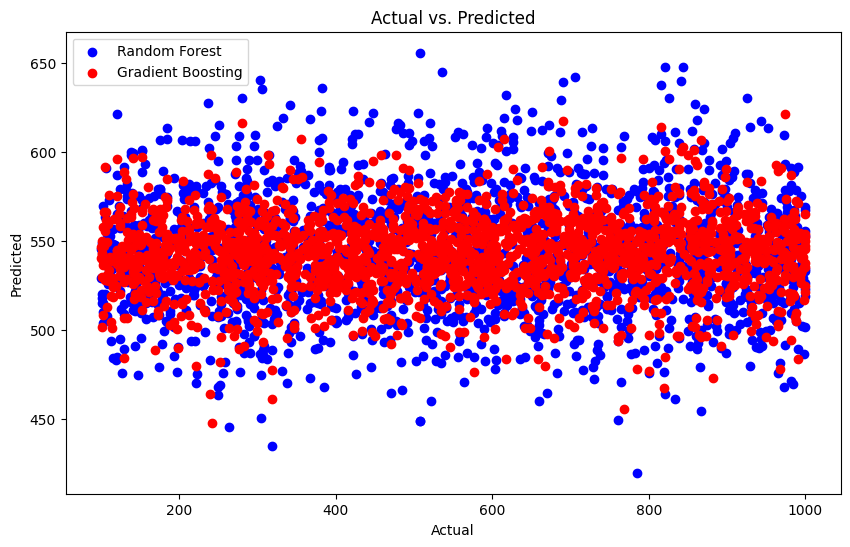

Decision Tree Regression:
Mean Squared Error: 306.76
R-squared: -1.09

Random Forest Regression:
Mean Squared Error: 226.98


In [ ]:

rf_mae = mean_absolute_error(y_test, rf_y_pred)
gb_mae = mean_absolute_error(y_test, gb_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

print("Mean Absolute Error for Random Forest Regressor:", rf_mae)
print(f"R-squared: {rf_r2:.2f}")
print("Mean Absolute Error for Gradient Forest Regressor:", gb_mae)
print(f"R-squared: {gb_r2:.2f}")


# Comparison
if rf_mae < gb_mae:
    print("Random Forest Regressor performs better.")
else:
    print("Gradient Boosting Regressor performs better.")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_y_pred, color='blue', label='Random Forest')
plt.scatter(y_test, gb_y_pred, color='red', label='Gradient Boosting')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

# Fine-tuning and Deployment steps are not implemented in this code snippet but are important to consider in practice.
print("Decision Tree Regression:")
print(f"Mean Squared Error: {dt_mae:.2f}")
print(f"R-squared: {dt_r2:.2f}")

# Create and train the Random Forest Regression model
rf_model = RandomForestRegressor(random_state=100)
rf_model.fit(X_train_processed, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_processed)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, y_pred_rf)
print("\nRandom Forest Regression:")
print(f"Mean Squared Error: {rf_mae:.2f}")


In [ ]:
X_test.to_numpy()[0]

array(['Google', 7.0, 4, 512, 1100, 64, 2000, 'Oceania', 'Q4'],
      dtype=object)

In [ ]:
y_test.to_numpy()[0]

105

In [ ]:
data.to_numpy()[0]

array(['Huawei', 5.2, 12, 128, 200, 8, 500, 'North America', 'Q4', 821],
      dtype=object)

In [ ]:
import joblib

# Combine the ColumnTransformer and the model
combined = {"transformer": ct, "gb_best_model": gb_best_model}

# Store the combined model and transformer
joblib.dump(combined, "demand_model.joblib")

['demand_model.joblib']

In [ ]:
# Reload the combined model and transformer
loaded_dict = joblib.load("demand_model.joblib")
loaded_ct = loaded_dict["transformer"]
loaded_model = loaded_dict["gb_best_model"]

# Use the loaded transformer for new data
new_data = [['Oppo', 5.2, 12, 128, 200, 8, 100, 'North America', 'Q4']]

# Convert new_data to a DataFrame
new_data_df = pd.DataFrame(new_data, columns=['Brand', 'Screen Size', 'RAM', 'Storage', 'Price (USD)', 'Camera (MP)', 'Marketing Budget (USD)', 'Region', 'Quarter'])

# Apply the transformation
new_data_processed = loaded_ct.transform(new_data_df)

# Predict on transformed new data
new_data_predictions = loaded_model.predict(new_data_processed)


array([527.70742892])

In [ ]:
int(new_data_predictions[0])

527

In [ ]:

# Save the model and transformer
with open('model_and_transformer.pkl', 'wb') as f:
    pickle.dump({'model': gb_best_model, 'transformer': ct}, f)

# Load the model and transformer
with open('model_and_transformer.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

loaded_model = loaded_dict['model']
loaded_ct = loaded_dict['transformer']